# OLIST
## Customer segmentation


In [268]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [312]:
%config IPCompleter.greedy=True
import pandas as pd
from collections import Counter
import numpy as nm
import matplotlib.pyplot as plt
import warnings
import random
import datetime
warnings.filterwarnings("ignore")

# Dataset
<img src="olist.png">

In [374]:
customers=pd.read_csv("olist_customers_dataset.csv")
customers.name= "customers"
geo=pd.read_csv("olist_geolocation_dataset.csv")
geo.name= "geolocation"
items=pd.read_csv("olist_order_items_dataset.csv")
items.name="order items"
payments=pd.read_csv("olist_order_payments_dataset.csv")
payments.name= "order payments"
reviews=pd.read_csv("olist_order_reviews_dataset.csv")
reviews.name= "order reviews"
orders=pd.read_csv("olist_orders_dataset.csv")
orders.name='orders'
products=pd.read_csv("olist_products_dataset.csv")
products.name="products"
sellers=pd.read_csv("olist_sellers_dataset.csv")
sellers.name="sellers"
geo= pd.read_csv("olist_geolocation_dataset.csv")
geo.name="Zip geolocalization"

In [287]:
def exploreFrequencies(customers):
    print("{0:30} {1:25} {2:25}".format(customers.name, "unique values", "missing values"))
    for i in customers:
        print("{0:30} {1:20} {2:20}".format(i, customers[i].nunique(),customers[i].isna().sum()))
    print("------------------------------------")

# Exploratory Analysis

## Dataset available columns, unique and missing values

In [289]:
exploreFrequencies(customers)
exploreFrequencies(items)
exploreFrequencies(payments)
exploreFrequencies(reviews)
exploreFrequencies(orders)
exploreFrequencies(products)
exploreFrequencies(sellers)
exploreFrequencies(geo)


customers                      unique values             missing values           
customer_id                                   99441                    0
customer_unique_id                            96096                    0
customer_zip_code_prefix                      14994                    0
customer_city                                  4119                    0
customer_state                                   27                    0
------------------------------------
order items                    unique values             missing values           
order_id                                      98666                    0
order_item_id                                    21                    0
product_id                                    32951                    0
seller_id                                      3095                    0
shipping_limit_date                           93318                    0
price                                          5968                

## Number customers and sellers per state

In [9]:
k=pd.DataFrame({'customers':customers['customer_state'].value_counts(),'sellers':sellers['seller_state'].value_counts()})
print("-------Customers and sellers location per state-----")
k=k.sort_values(by='customers',ascending=False)
k=k.fillna(0)
print(k)
k['sellers']= k['sellers'].apply( lambda x:x/k['sellers'].sum())
k['customers']= k['customers'].apply( lambda x:x/k['customers'].sum())

-------Customers and sellers location per state-----
    customers  sellers
SP      41746   1849.0
RJ      12852    171.0
MG      11635    244.0
RS       5466    129.0
PR       5045    349.0
SC       3637    190.0
BA       3380     19.0
DF       2140     30.0
ES       2033     23.0
GO       2020     40.0
PE       1652      9.0
CE       1336     13.0
PA        975      1.0
MT        907      4.0
MA        747      1.0
MS        715      5.0
PB        536      6.0
PI        495      1.0
RN        485      5.0
AL        413      0.0
SE        350      2.0
TO        280      0.0
RO        253      2.0
AM        148      1.0
AC         81      1.0
AP         68      0.0
RR         46      0.0


## Percentage of customers and sellers per state

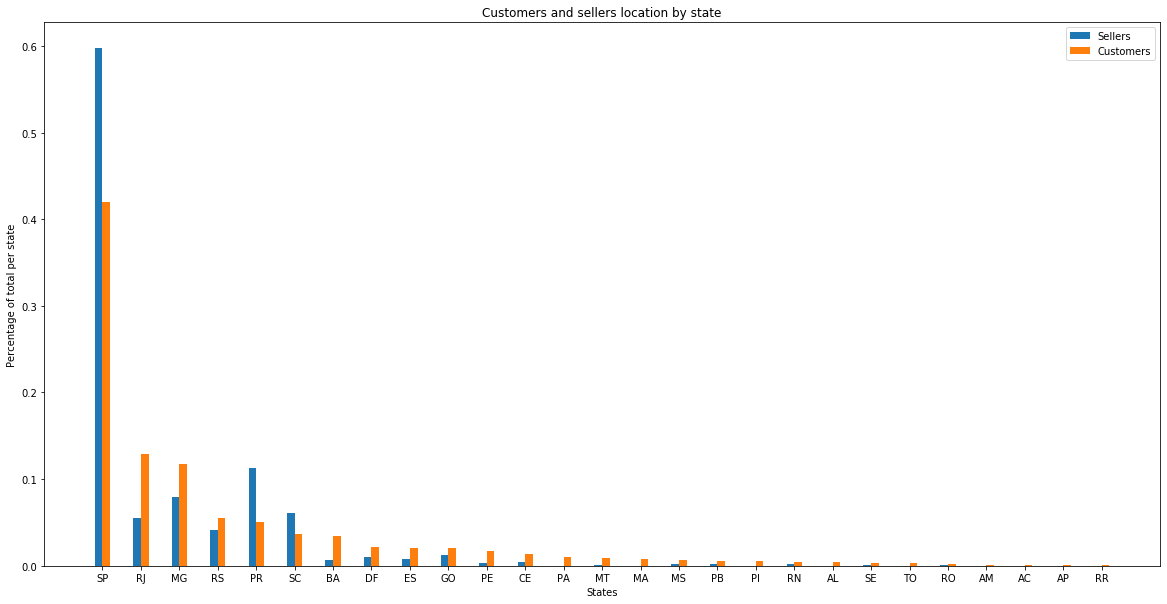

In [10]:

labels = k.T.columns
sel = k['sellers']
cus = k['customers']

x = nm.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))

rects1 = ax.bar(x - width/2, sel, width, label='Sellers')
rects2 = ax.bar(x + width/2, cus, width, label='Customers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of total per state')
ax.set_xlabel('States')
ax.set_title('Customers and sellers location by state')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

## Order total and item price visualization

Text(0, 0.5, 'currency units')

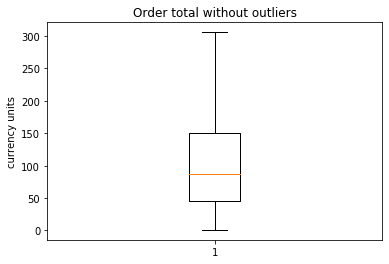

In [200]:
plt.boxplot(items.groupby(by='order_id')['price'].sum(), showfliers=False)
plt.title("Order total without outliers")
plt.ylabel("currency units")

Text(0, 0.5, 'currency units')

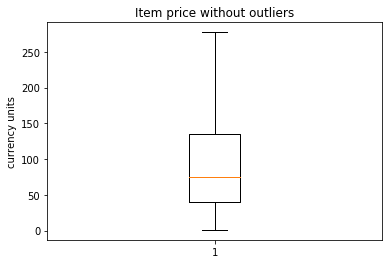

In [201]:
plt.boxplot(items['price'], showfliers=False)
plt.title("Item price without outliers")
plt.ylabel("currency units")

## Number of items sold by one seller

Text(0, 0.5, 'Number of items')

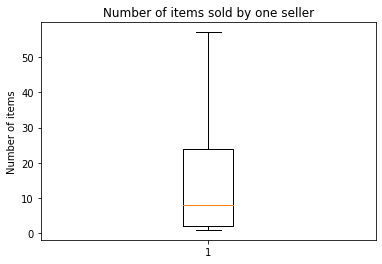

In [213]:
d=pd.DataFrame(items.groupby(by='seller_id').size().sort_values(0,ascending=False))
d.head(5)
plt.boxplot(d.T,showfliers=False)
plt.title("Number of items sold by one seller")
plt.ylabel("Number of items")

## Preferred payment methods

Text(0, 0.5, 'Number of transactions used a specific method')

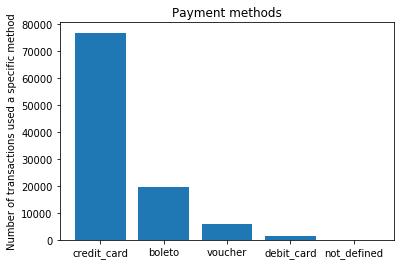

In [215]:
z=pd.DataFrame(payments['payment_type'].value_counts())
plt.bar(z.index, z.payment_type,tick_label=z.T.columns)
plt.title("Payment methods")
plt.ylabel("Number of transactions used a specific method")


## Number of items per order

Text(0, 0.5, 'Percentage')

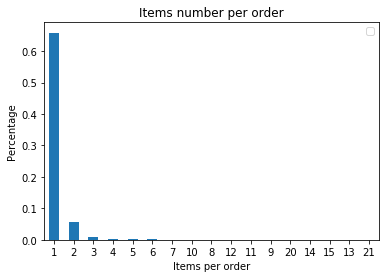

In [294]:
ax=pd.DataFrame(items.groupby(by='order_id')['order_item_id'].size().value_counts()).apply(lambda x:x/items['order_item_id'].sum()).plot(kind="bar", title="Items number per order", rot=0)
ax.legend("")
ax.set_xlabel("Items per order")
ax.set_ylabel("Percentage")




## Orders per year

2018    54011
2017    45101
2016      329
Name: year, dtype: int64


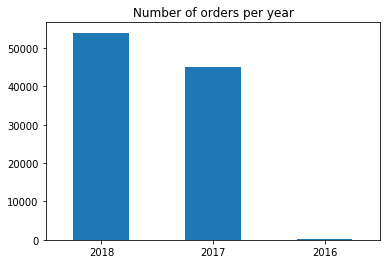

In [221]:
orders["year"]= orders['order_purchase_timestamp'].str[:4]
col=[orders["year"]==2017]
sc=orders["year"].value_counts()
print(sc)

ax=sc.plot(kind="bar", title="Number of orders per year", rot=0)


In [205]:
#will remove
orders.pivot_table(index=['customer_id'], aggfunc='size').value_counts()

1    99441
dtype: int64

## Number of reviews per order

1    98886
2      551
3        4
dtype: int64


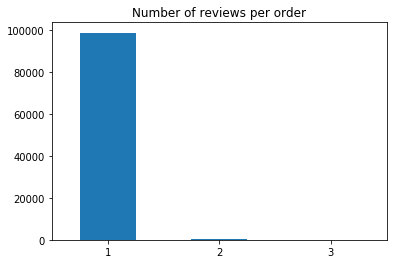

In [222]:
#reviews per order
a=reviews.groupby('order_id').size()
dd=a.value_counts()
print(dd)
az=dd.plot(kind="bar", title= "Number of reviews per order", rot=0)
az

## Distribution of review scores

Text(0, 0.5, 'Order number for a specific review score')

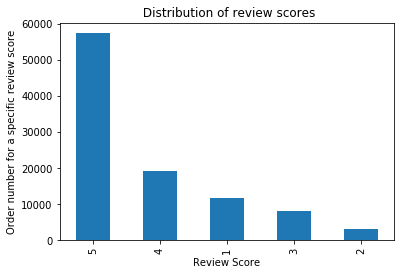

In [224]:
o=reviews['review_score'].value_counts()
ax=o.plot(kind='bar', title= " Distribution of review scores", rot=90)
ax.set_xlabel("Review Score")
ax.set_ylabel("Order number for a specific review score")


## Analysis of item price and freight cost

In [92]:
items[['price','freight_value']].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


Text(0.5, 0, 'Item price')

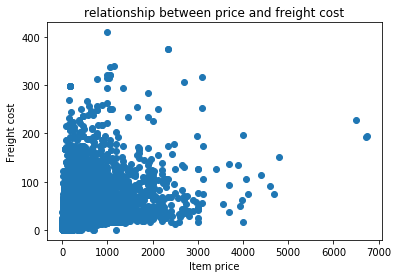

In [225]:
plt.scatter(items['price'], items['freight_value'])
plt.title("relationship between price and freight cost")
plt.ylabel("Freight cost")
plt.xlabel("Item price")

## Relationship between description length, photos number and number of sold items

       quantity_sold  product_description_lenght
count   32951.000000                32341.000000
mean        3.418713                  771.495285
std        10.619709                  635.115225
min         1.000000                    4.000000
25%         1.000000                  339.000000
50%         1.000000                  595.000000
75%         3.000000                  972.000000
max       527.000000                 3992.000000


Text(0.5, 0, 'Quantity sold')

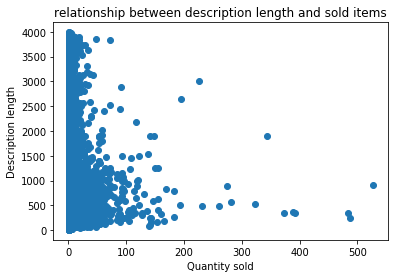

In [244]:
f=products[['product_id','product_description_lenght','product_photos_qty']]
i=pd.DataFrame(items.groupby(by='product_id').size()).reset_index()
f= f.merge(i, how="left", on='product_id')
f['quantity_sold']=f[0]
f=f.drop(0, axis=1)
print(f[['quantity_sold','product_description_lenght']].describe())
plt.scatter(f['quantity_sold'], f['product_description_lenght'])
plt.title("relationship between description length and sold items")
plt.ylabel("Description length")
plt.xlabel("Quantity sold")

       quantity_sold  product_photos_qty
count   32951.000000        32341.000000
mean        3.418713            2.188986
std        10.619709            1.736766
min         1.000000            1.000000
25%         1.000000            1.000000
50%         1.000000            1.000000
75%         3.000000            3.000000
max       527.000000           20.000000


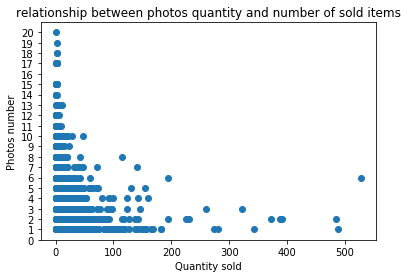

In [267]:
print(f[['quantity_sold','product_photos_qty']].describe())
plt.scatter(f['quantity_sold'], f['product_photos_qty'])
plt.title("relationship between photos quantity and number of sold items")
plt.ylabel("Photos number")
plt.xlabel("Quantity sold")
plt.yticks(nm.arange(0, 21, step=1))
plt.show()

# Feature engineering
## Number of orders per customer

In [176]:
s=pd.DataFrame(customers.groupby('customer_unique_id').size().reset_index())
s['nbOrders']=s[0]
s.drop(0,axis=1)
f=s['nbOrders'].value_counts()
f

1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
17        1
9         1
Name: nbOrders, dtype: int64

Text(0, 0.5, 'Number of orders per customer')

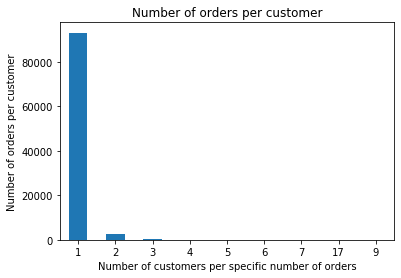

In [297]:
d=s.merge(customers.drop_duplicates('customer_unique_id',keep="last"),how='left',on="customer_unique_id")
co=d['nbOrders'].value_counts()
#plt.bar(co.index,co.values)
ax=co.plot(kind='bar', title="Number of orders per customer", rot=0)
ax.set_xlabel("Number of customers per specific number of orders")
ax.set_ylabel("Number of orders per customer")

In [309]:
ordersList=customers.groupby('customer_unique_id')['customer_id'].apply(list).to_dict()

#list of customer_ids associated with customer_unique_ids. 1 customer unique id can have many ids      

## Average Order Total Spent by a customer

In [671]:
'''
money= pd.DataFrame(columns=["customer_unique_id","total"])
for i in ordersList:
    total=0
    orderCounter=0
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        for orde in ordersPerCs:
            orderCounter=orderCounter+1
            
            itemsOrder=items.loc[items['order_id']==orde[0]].values
            for ea in itemsOrder:
                #print(ea[1])
            #if(len(itemsOrder['price'])>0):
                #total+=itemsOrder['price'].values[0]  
                total+=ea[5]
    if orderCounter>0:
        v=total/orderCounter
    else:
        v=0
        print(total)
    
    money=money.append({'customer_unique_id':i, 'total':v},ignore_index=True)
money.to_csv("averagePerOrderMoneySpent.csv", encoding='utf-8', index=False)
'''

count    96096.000000
mean       137.163463
std        210.735847
min          0.000000
25%         45.827500
50%         85.990000
75%        149.900000
max      13440.000000
Name: total, dtype: float64


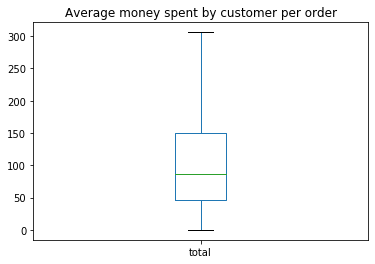

In [278]:
money=pd.read_csv("averagePerOrderMoneySpent.csv")
print(money['total'].describe())
money['total'].plot(kind='box', showfliers=False, title="Average money spent by customer per order")


## Average review score by customer

In [407]:
'''
revs= pd.DataFrame(columns=["customer_unique_id","reveiwScore"])
for i in ordersList:
    score=0
    count=0
    
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        for orde in ordersPerCs:
            reviewsOrder=reviews.loc[reviews['order_id']==orde[0]].values
            for r in reviewsOrder:
                score=score+r[2]
                count=count+1
                
    revs=revs.append({'customer_unique_id':i, 'reviewScore':score/count},ignore_index=True)
revs.to_csv("reviewsCustomers.csv", encoding='utf-8', index=False)
 '''   
    

count    96096.000000
mean         4.069535
std          1.353446
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviewScore, dtype: float64


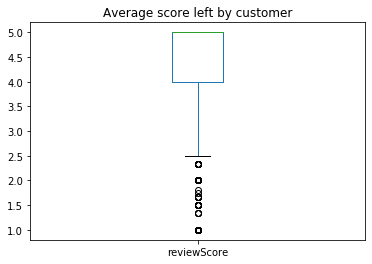

In [281]:
revs=pd.read_csv("reviewsCustomers.csv")
print(revs['reviewScore'].describe())
revs['reviewScore'].plot(kind='box', title="Average score left by customer")

## Number of resellers per customer

In [449]:
'''
vendeurs= pd.DataFrame(columns=["customer_unique_id","totalSellers"])
for i in ordersList:
    total=[]
    
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        for orde in ordersPerCs:
            itemsOrder=items.loc[items['order_id']==orde[0]]
            if(len(itemsOrder['seller_id'])>0):
                
                sstr=str(itemsOrder['seller_id'].values)
                
                if (sstr not in total):
                    
                    total.append(sstr)
    vendeurs=vendeurs.append({'customer_unique_id':i, 'totalSellers':len(total)},ignore_index=True)
vendeurs.to_csv("resellersPerCustomer.csv", encoding='utf-8', index=False)

'''

1    93160
2     2104
0      676
3      126
4       16
5        7
6        5
9        1
8        1
Name: totalSellers, dtype: int64


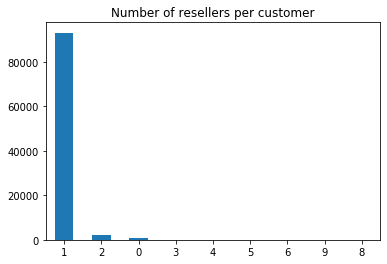

In [285]:
vend=pd.read_csv("resellersPerCustomer.csv")
print(vend['totalSellers'].value_counts())
vend['totalSellers'].value_counts().plot(kind='bar', title="Number of resellers per customer",rot=0)


## Maximum distance purchased from per customer

In [587]:
from math import sin, cos, sqrt, atan2, radians

def distance(a,b):
    R = 6373.0
    aa=geo.loc[geo['geolocation_zip_code_prefix'].values == a].head(1)
    bb= geo.loc[geo['geolocation_zip_code_prefix'].values == b].head(1)
    if len(aa)==0:
        a1= geo['geolocation_lat'].mean()
        a2= geo['geolocation_lng'].mean()
    else:
        a1=aa['geolocation_lat'].values
        a2=aa['geolocation_lng'].values
    if len(bb)==0:
        b1= geo['geolocation_lat'].mean()
        b2= geo['geolocation_lng'].mean()
    else:
        b1=bb['geolocation_lat'].values
        b2=bb['geolocation_lng'].values
            
   
    lat1 = radians(a1)
    lon1 = radians(a2)
    lat2 = radians(b1)
    lon2 = radians(b2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c


In [589]:
'''
distances= pd.DataFrame(columns=["customer_unique_id","maximumDistance"])
for i in ordersList:
    total=0
    customerZip=customers.loc[customers['customer_unique_id']==i]['customer_zip_code_prefix'].values[0]
    
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        for orde in ordersPerCs:
            itemsOrder=items.loc[items['order_id']==orde[0]]
            if(len(itemsOrder['seller_id'])>0):
                    for sal in itemsOrder['seller_id']:
                        zips= sellers.loc[sellers['seller_id']==sal]
                        sellerZip=zips['seller_zip_code_prefix'].values
                        #print(customerZip)
                        #print(int(sellerZip))
                        if(int(customerZip)>0 and int(sellerZip)>0):
                            dist=distance(int(customerZip),int(sellerZip))
                            if dist>total:
                                total=dist
                            
    distances=distances.append({'customer_unique_id':i, 'maximumDistance': total},ignore_index=True)
distances.to_csv("MaximumDistancePerCustomer.csv", encoding='utf-8', index=False)

'''

count    96096.000000
mean       602.349296
std        598.388790
min          0.000000
25%        184.449508
50%        434.235259
75%        802.016361
max       8739.690342
Name: maximumDistance, dtype: float64


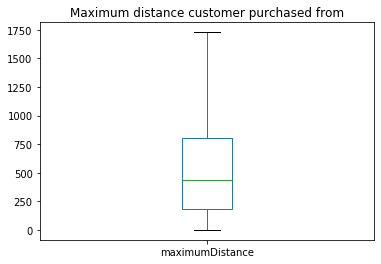

In [292]:
distance=pd.read_csv("MaximumDistancePerCustomer.csv")
print(distance['maximumDistance'].describe())
distance['maximumDistance'].plot(kind='box', title="Maximum distance customer purchased from", showfliers=False)

## Average number of items per customer order

In [314]:
'''
itemsNumber= pd.DataFrame(columns=["customer_unique_id","nbItems"])
#get all customer ids
for i in ordersList:
    totalItems=[]
    
    
    #get all customer orders corresponding to ids
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        #get all orders items corresponding to ids
        
        for orde in ordersPerCs:
            
            itemsOrder=items.loc[items['order_id']==orde[0]]
            if(itemsOrder.shape[0]>0):
                totalItems.append(itemsOrder.shape[0])
    
    if len(totalItems)>0:
        c = Counter(totalItems)
        v=c.most_common(1)[0][0]
        
    else:
        v=0
        
    itemsNumber=itemsNumber.append({'customer_unique_id':i, 'nbItems': v},ignore_index=True)
    
itemsNumber.to_csv("itemsNumberPerCustomer.csv", encoding='utf-8', index=False)
'''

1    86116
2     7172
3     1232
0      676
4      471
Name: nbItems, dtype: int64


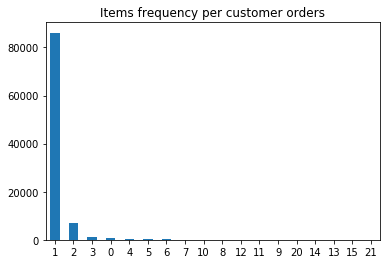

In [346]:
itemsNumber=pd.read_csv("itemsNumberPerCustomer.csv")
vv=itemsNumber['nbItems'].value_counts()
print(vv.head(5))
vv.plot(kind='bar', title="Items frequency per customer orders",rot=0)

## customer payment method


In [656]:
'''
from collections import Counter

paymentMethod= pd.DataFrame(columns=["customer_unique_id","paymentMethod"])
#get all customer ids
for i in ordersList:
    totalItems=[]
    
    
    #get all customer orders corresponding to ids
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        #get all orders items corresponding to ids
        
        for orde in ordersPerCs:
            
            method=payments.loc[payments['order_id']==orde[0]]
            if(method.empty!=True):
                
                totalItems.append(method.values[0][2])
    if len(totalItems)>0:
        c = Counter(totalItems)
        v=c.most_common(1)[0][0]
    else:
        v='not known'
    
    paymentMethod=paymentMethod.append({'customer_unique_id':i, 'paymentMethod': v},ignore_index=True)
    
paymentMethod.to_csv("paymentMethod.csv", encoding='utf-8', index=False)
'''

credit_card    72861
boleto         19161
voucher         2583
debit_card      1487
not_defined        3
not known          1
Name: paymentMethod, dtype: int64


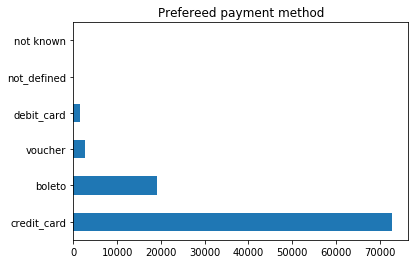

In [304]:
paymentMethod=pd.read_csv("paymentMethod.csv")
v=paymentMethod['paymentMethod'].value_counts()
print(v)
ax=v.plot(kind='barh', title="Prefereed payment method")
ax

## Preferred Cathegory

In [695]:
'''
category= pd.DataFrame(columns=["customer_unique_id","category"])
#get all customer ids
for i in ordersList:
    totalItems=[]
    #get all customer orders corresponding to ids
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        #get all orders items corresponding to ids
        
        for orde in ordersPerCs:
            
            itemsOrder=items.loc[items['order_id']==orde[0]].values
            for ea in itemsOrder:
                
                produits=products.loc[products['product_id']==ea[2]].values
                
                if (len(produits[0])>0):
                    totalItems.append(produits[0][1])
                        
                                      
    if len(totalItems)>0:
        c = Counter(totalItems)
        c=c.most_common(1)[0][0]
        
    else:
        v='not known'
    
    category=category.append({'customer_unique_id':i, 'category': c},ignore_index=True)
category.to_csv("categoryCustomers.csv", encoding='utf-8', index=False)
'''

Number of preferred categories: 74
First 10 categories represent :62.902722277722276% of customers choice


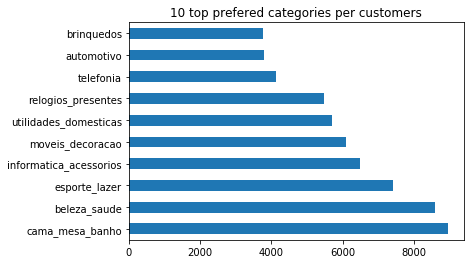

In [344]:
category=pd.read_csv("categoryCustomers.csv")
print("Number of preferred categories: "+str(len(category['category'].unique())))
print("First 10 categories represent :"+str(category['category'].value_counts().head(10).values.sum()/len(category['category'])*100)+ "% of customers choice")

ax=category['category'].value_counts().head(10).plot(kind='barh', title="10 top prefered categories per customers")
ax

## Prefered reseller by customer

In [358]:
'''
frequentReseller= pd.DataFrame(columns=["customer_unique_id","frequent reseller"])
#get all customer ids
for i in ordersList:
    totalSellers=[]
    #get all customer orders corresponding to ids
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        #get all orders items corresponding to ids
        
        for orde in ordersPerCs:
            
            itemsOrder=items.loc[items['order_id']==orde[0]].values
            for ea in itemsOrder:
                
                totalSellers.append(ea[3])
                                    
    if len(totalSellers)>0:
        c = Counter(totalSellers)
        c=c.most_common(1)[0][0]
        
    else:
        c='not known'
    
    frequentReseller=frequentReseller.append({'customer_unique_id':i, 'frequent reseller': c},ignore_index=True)
frequentReseller.to_csv("frequentResellers.csv", encoding='utf-8', index=False)
'''

'\nfrequentReseller= pd.DataFrame(columns=["customer_unique_id","frequent reseller"])\n#get all customer ids\nfor i in ordersList:\n    totalSellers=[]\n    #get all customer orders corresponding to ids\n    for u in ordersList[i]:\n        ordersPerCs=orders.loc[orders[\'customer_id\']==u].values\n        #get all orders items corresponding to ids\n        \n        for orde in ordersPerCs:\n            \n            itemsOrder=items.loc[items[\'order_id\']==orde[0]].values\n            for ea in itemsOrder:\n                \n                totalSellers.append(ea[3])\n                                    \n    if len(totalSellers)>0:\n        c = Counter(totalSellers)\n        c=c.most_common(1)[0][0]\n        \n    else:\n        c=\'not known\'\n    \n    frequentReseller=frequentReseller.append({\'customer_unique_id\':i, \'frequent reseller\': c},ignore_index=True)\nfrequentReseller.to_csv("frequentResellers.csv", encoding=\'utf-8\', index=False)\n'

Number of preferred resellers: 3063
Top 200 resellers represent :58.94626207126207% of customers choice


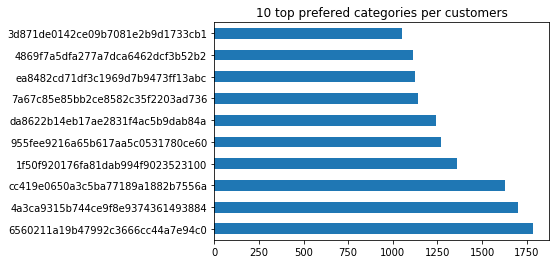

In [356]:
frequentReseller=pd.read_csv("frequentResellers.csv")
print("Number of preferred resellers: "+str(len(frequentReseller['frequent reseller'].unique())))
print("Top 200 resellers represent :"+str(frequentReseller['frequent reseller'].value_counts().head(200).values.sum()/len(frequentReseller['frequent reseller'])*100)+ "% of customers choice")
frequentReseller['frequent reseller'].value_counts().head(10).plot(kind='barh', title="10 top resellers")


## Preferred city to purchase from

In [717]:
'''
purchaseCity= pd.DataFrame(columns=["customer_unique_id","frequent purchase city"])
#get all customer ids
for i in ordersList:
    totalAreas=[]
    #get all customer orders corresponding to ids
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        #get all orders items corresponding to ids
        
        for orde in ordersPerCs:
            
            itemsOrder=items.loc[items['order_id']==orde[0]].values
            for ea in itemsOrder:
                zips= sellers.loc[sellers['seller_id']==ea[3]].values
                zipo= zips[0][2]
                
                totalAreas.append(zipo)
                                  
    if len(totalAreas)>0:
        c = Counter(totalAreas)
        c=c.most_common(1)[0][0]
        
    else:
        v='not known'
    
    purchaseCity=purchaseCity.append({'customer_unique_id':i, 'frequent purchase city': c},ignore_index=True)
purchaseCity.to_csv("frequentCity.csv", encoding='utf-8', index=False)
'''

sao paulo                23867
ibitinga                  6201
santo andre               2582
curitiba                  2582
belo horizonte            2355
rio de janeiro            2116
guarulhos                 2012
ribeirao preto            1960
sao jose do rio preto     1899
maringa                   1770
Name: frequent purchase city, dtype: int64


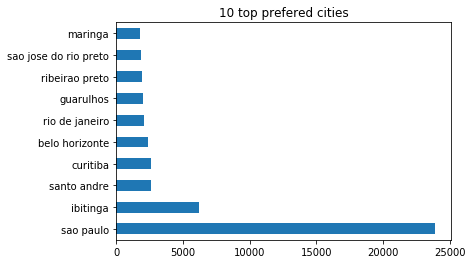

In [362]:
purchaseCity=pd.read_csv("frequentCity.csv")
c=purchaseCity['frequent purchase city'].value_counts().head(10)
print(c)
c.plot(kind="barh", title="10 top prefered cities")

## Year of the last purchase

In [375]:
purchaseYear= pd.DataFrame(columns=["customer_unique_id","lastPurchase"])
#get all customer ids
for i in ordersList:
    totalYear=0
    #get all customer orders corresponding to ids
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        #get all orders items corresponding to ids
        
        for orde in ordersPerCs:
            if pd.isna(orde[4])!=True:
                
                year=int(orde[4][:4])
                if(year>totalYear):
                    totalYear=year
                    
            else:
                totalYear=2018
    purchaseYear=purchaseYear.append({'customer_unique_id':i, 'lastPurchase': totalYear},ignore_index=True)
purchaseYear.to_csv("lastPurchase.csv", encoding='utf-8', index=False)



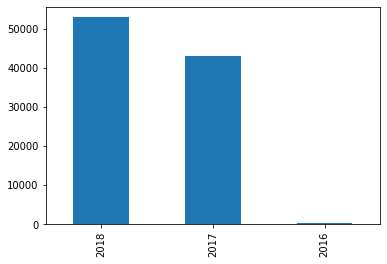

In [378]:
purchaseYear["lastPurchase"].value_counts().plot(kind="bar")